# Functionality: visualization of functional connectivity

<ul>
    <li>visualize the ciCOH in mild and normal state</li>
</ul>

## Import Packages 

In [1]:
import os, sys
import numpy as np
import pandas as pd

import pickle

from igraph.drawing.text import TextDrawer
import cairo

In [2]:
# import_nbmodule used for import package in .ipynb
import import_nbmodule

# extract the exp folder path
currfolder = os.getcwd()
codefolder = currfolder[0 : currfolder.find('code')+len('code')]

# add path the exp folder
sys.path.append(codefolder)


# import animal_folder function in util/folder_extract.pynb 
from util.folder_extract import exp_subfolders, code_corresfolder

# import graphVisual in connAnalyTool/graphVisual.pynb 
from connAnalyTool import graphVisual

importing Jupyter notebook from /home/lingling/Insync/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/util/folder_extract.ipynb
importing Jupyter notebook from /home/lingling/Insync/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/connAnalyTool/graphVisual.ipynb


## Preparison

### exp subfolders & code_corresfolder

In [3]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [4]:
nb_name = nb_name[0: nb_name.find('.ipynb')]

# corresfolder
corresfolder,correparentfolder = code_corresfolder(os.getcwd(), nb_name)

### global parameters

In [5]:
# frequency
freq = [16, 18]
strfreq = 'freq' + str(freq[0]) + '_' + str(freq[1])


# eventphase
event = 'rest'


sameDates4SKTRest = False

In [6]:
### text setup for brain areas ###
texts_area = dict()


texts_area['M1'] = [20, 500, 20]

texts_area['STN'] = [280, 140, 20]

texts_area['GP'] = [360, 250, 20]

In [7]:
WithinM1NoShow = False
STNConnectOnly = False
GPConnectOnly = False
CorticalConnectOnly = False
halfs = False

### input setup

In [8]:
inputfolder = os.path.join(correparentfolder, 'm1_calcciCOH_rest')
filename =  'ciCOH_rest' + '_freq' + str(freq[0]) + '_' + str(freq[1])

if halfs:
    filename = filename + '_halfs'
    
if sameDates4SKTRest:
    filename = filename + '_samedays'

file = os.path.join(inputfolder, filename + '.pickle')

### save setup

In [9]:
savefolder = corresfolder
savefile_prefix_origin = 'ciCOH_' + event + '_' + strfreq

if halfs:
    savefile_prefix_origin = savefile_prefix_origin + 'halfs'

    
    
if sameDates4SKTRest:
    filename = savefile_prefix_origin + '_samedays'

## Load ciCOH and Channel

In [10]:
fp = open(file, 'rb')
ciCOH = pickle.load(fp)

In [11]:
# ciCOH
ciCOH_normal, ciCOH_mild  = ciCOH['normal'], ciCOH['mild'], 
#ciCOH_moderate = ciCOH['moderate']

# channel information
chnInf_recchni, chnInf_matchni = ciCOH['chnInf_recchni'], ciCOH['chnInf_matchni']
chnInf_brainarea, chnInf_coord = ciCOH['chnInf_brainarea'], ciCOH['chnInf_coord']
ntrials = ciCOH['ntrials']

print(ntrials)

155


## Show Selection 

In [12]:
ciCOH_normal_origin, ciCOH_mild_origin = ciCOH_normal, ciCOH_mild

### Only Show Cortical Areas

In [13]:
if CorticalConnectOnly:
    ciCOH_normal, ciCOH_mild, ciCOH_moderate = ciCOH_normal_origin, ciCOH_mild_origin, ciCOH_moderate_origin
    
    indices = [idx for idx, area in enumerate(chnInf_brainarea) if area != 'M1' and 'SMA' not in area]
    
    # only keep the ciCOH values within M1 and SMA
    ciCOH_normal[indices, :] = 0
    ciCOH_normal[:, indices] = 0
    
    ciCOH_mild[indices, :] = 0
    ciCOH_mild[:, indices] = 0
    
    ciCOH_moderate[indices, :] = 0
    ciCOH_moderate[:, indices] = 0
    
    
    ciCOH_normal_onlyCortical, ciCOH_mild_onlyCortical, ciCOH_moderate_onlyCortical = ciCOH_normal, ciCOH_mild, ciCOH_moderate
    
    del ciCOH_normal, ciCOH_mild, ciCOH_moderate

### Not Show Connections inside M1

In [14]:
if WithinM1NoShow:
    
    ciCOH_normal, ciCOH_mild = ciCOH_normal_origin, ciCOH_mild_origin
    
    indices = [idx for idx, area in enumerate(chnInf_brainarea) if area == 'M1']
    
    for chni in indices:
        for chnj in indices:
            ciCOH_normal[chni,chnj] = 0
            ciCOH_mild[chni,chnj] = 0
    
    savefile_prefix = savefile_prefix + '_noWithinM1'
    ciCOH_normal_noWithinM1, ciCOH_mild_noWithinM1 = ciCOH_normal, ciCOH_mild
    
    del ciCOH_normal, ciCOH_mild

### Only show DBS Connections

In [15]:
if STNConnectOnly:
    
    indices = [idx for idx, area in enumerate(chnInf_brainarea) if area == 'STN']
    
    # only keep the ciCOH values for STN
    ciCOH_normal, ciCOH_mild = np.zeros(ciCOH_normal_origin.shape), np.zeros(ciCOH_mild_origin.shape)
    ciCOH_moderate = np.zeros(ciCOH_moderate_origin.shape)
    
    ciCOH_normal[indices, :] = ciCOH_normal_origin[indices,:]
    ciCOH_normal[:, indices] = ciCOH_normal_origin[:,indices]
    
    ciCOH_mild[indices, :] = ciCOH_mild_origin[indices,:] 
    ciCOH_mild[:, indices] = ciCOH_mild_origin[:,indices]
    
    ciCOH_moderate[indices, :] = ciCOH_moderate_origin[indices,:] 
    ciCOH_moderate[:, indices] = ciCOH_moderate_origin[:,indices]
    
    
    ciCOH_normal_onlySTN, ciCOH_mild_onlySTN, ciCOH_moderate_onlySTN = ciCOH_normal, ciCOH_mild, ciCOH_moderate
    
    del ciCOH_normal, ciCOH_mild, ciCOH_moderate

In [16]:
if GPConnectOnly:
    
    indices = [idx for idx, area in enumerate(chnInf_brainarea) if area == 'GP']
    
    # only keep the ciCOH values for GP
    ciCOH_normal, ciCOH_mild = np.zeros(ciCOH_normal_origin.shape), np.zeros(ciCOH_mild_origin.shape)
    ciCOH_moderate = np.zeros(ciCOH_moderate_origin.shape)
    
    ciCOH_normal[indices, :] = ciCOH_normal_origin[indices,:]
    ciCOH_normal[:, indices] = ciCOH_normal_origin[:,indices]
    
    ciCOH_mild[indices, :] = ciCOH_mild_origin[indices,:] 
    ciCOH_mild[:, indices] = ciCOH_mild_origin[:,indices]
    
    ciCOH_moderate[indices, :] = ciCOH_moderate_origin[indices,:] 
    ciCOH_moderate[:, indices] = ciCOH_moderate_origin[:,indices]
    
    
    ciCOH_normal_onlyGP, ciCOH_mild_onlyGP, ciCOH_moderate_onlyGP = ciCOH_normal, ciCOH_mild, ciCOH_moderate
    
    del ciCOH_normal, ciCOH_mild, ciCOH_moderate

## ciCOH Visual

In [17]:
def ciCOH_visual_save(ciCOH, chn_area, chn_coord, str_recchnishow, lowweight, tobesavedfile, texts, threds = None):
    """
        
        Args:
            
            ciCOH (np.sdarray): ciCOH matrix (nchns, nchns)
            
            chn_area (list): a list of string representing brain area for each channel, len(chn_area) = nchns
            
            chn_coord (numpy.ndarray): x, y coordinates for each channel, shape = (nchns, 2)
            
            chn_recchni(list): showed recording chni for each channel, shape = (nchns, )
            
            lowweight: the threshold lowweight, only weight>lowweight is treated as connection
            
            tobesavedfile: file to save the visualized figure
            
            texts:
            
        Output:
            the visualizaton of ciCOH is saved in tobesavedfile
            
    """
    
    weight = abs(ciCOH)

    # weight > lowweight
    weight[np.where(weight<lowweight)] =0
    
    
    # create new graph
    graph = graphVisual.graph_create(weight, vsarea = chn_area, vscoord = chn_coord, vschni = str_recchnishow)

    
    
    # set graph visualization style
    visual_style = dict()
    if threds is not None:
        colors_opt = ['gray', '#ff7f0e','blue' ,'#d62728']
        
        colors = ['black'] * len(graph.es['weight'])
        for i, w in enumerate(graph.es['weight']):
            if w > threds[2]: 
                colors[i] = colors_opt[3]
            elif w > threds[1]:
                colors[i] = colors_opt[2]
            elif w > threds[0]:
                colors[i] = colors_opt[1]
                
        visual_style['edge_color'] = colors

    visual_style = graphVisual.graph_style(graph, visual_style)
    

    
    # plot graph
    igplot = graphVisual.graph_plot(graph, visual_style, texts = texts)
    
    # save graph
    igplot.save(tobesavedfile)
    
    
    return igplot

## Save

In [18]:
# threshold lowweight
lowweight = 0.2

In [19]:
savefile_prefix = savefile_prefix_origin

if STNConnectOnly:
    ciCOH_normal, ciCOH_mild, ciCOH_moderate = ciCOH_normal_onlySTN, ciCOH_mild_onlySTN, ciCOH_moderate_onlySTN
    savefile_prefix = savefile_prefix_origin + '_onlySTN'

if GPConnectOnly:
    ciCOH_normal, ciCOH_mild, ciCOH_moderate = ciCOH_normal_onlyGP, ciCOH_mild_onlyGP, ciCOH_moderate_onlyGP
    savefile_prefix = savefile_prefix_origin + '_onlyGP'
    
if CorticalConnectOnly:
    ciCOH_normal, ciCOH_mild, ciCOH_moderate = ciCOH_normal_onlyCortical, ciCOH_mild_onlyCortical, ciCOH_moderate_onlyCortical
    savefile_prefix = savefile_prefix_origin + '_onlyCortical'
    
if WithinM1NoShow:
    ciCOH_normal, ciCOH_mild = ciCOH_normal_noWithinM1, ciCOH_mild_noWithinM1
    savefile_prefix = savefile_prefix_origin + '_noWithinM1'

In [20]:
xmax = max(np.amax(abs(ciCOH_normal)), np.amax(abs(ciCOH_mild)))
threds = [lowweight, lowweight + (xmax - lowweight)/3, lowweight + (xmax - lowweight) * 2/3]
threds = np.around(threds, decimals=2)

In [21]:
ntimes = ciCOH_normal.shape[0] * ciCOH_normal.shape[1]

print(ntimes)
print(ntrials)

12100
155


In [26]:
from simulated.ciCOH_threshold import threshold_ciCOH_sin,corr_threshold_ciCOH_sin_BH

identifying the ciCOH threshold using sinc.....
run the sinc simulation at timei = 0/1000
run the sinc simulation at timei = 100/1000
run the sinc simulation at timei = 200/1000
run the sinc simulation at timei = 300/1000
run the sinc simulation at timei = 400/1000
run the sinc simulation at timei = 500/1000
run the sinc simulation at timei = 600/1000
run the sinc simulation at timei = 700/1000
run the sinc simulation at timei = 800/1000
run the sinc simulation at timei = 900/1000


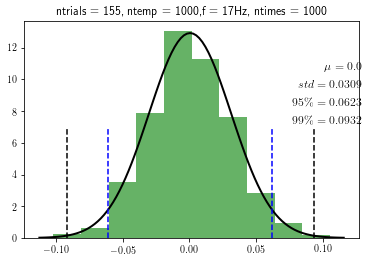

threshold = 0.06, mu = 0.0005388273154827793, std = 0.03087710463203713


In [27]:
threshold, mu, std = threshold_ciCOH_sin(ntimes = 1000, ntrials = ntrials, ntemp = 1000, f = 17, t = 1, alpha = 0.05, ploton = True)

In [29]:
false_conns = 10
false_rate = false_conns/ntimes
corrected_threshold = corr_threshold_ciCOH_sin_BH(ciCOHs_tri, ntimes = ntimes, ntrials =ntrials, ntemp = 1000, mu = 0, std = 0.03, f = 17, t = 1, false_rate = false_rate)

identifying the ciCOH corrected threshold using sinc and Benjamini-Hochberg procedure....
corrected threshold = 0.10410773954480013


In [ ]:
A = ([[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
m = A.shape[0]
r,c = np.triu_indices(m,1)
A[r,c]

### normal

In [ ]:
"""
    normal condition
"""


# save file config
savefilename = savefile_prefix + '_lowweight' + str(lowweight) + '_normal' + '.png'
savefile = os.path.join(savefolder, savefilename)

# printed text config
texts = texts_area.copy()


# visualize and save
igplot = ciCOH_visual_save(ciCOH_normal, 
                           chn_area = chnInf_brainarea, 
                           chn_coord = chnInf_coord,
                           str_recchnishow = chnInf_recchni,
                           lowweight = lowweight,  
                           tobesavedfile = savefile, 
                           texts = texts,
                           threds = threds)

igplot.show()

print("Figure saved to " + savefile)

del savefilename, savefile, texts, igplot

### mild

In [ ]:
"""
    mild condition
"""


condition = 'mild'


# save file config
savefilename = savefile_prefix + '_lowweight' + str(lowweight) + '_' + condition + '.png'
savefile = os.path.join(savefolder, savefilename)

# printed text config
texts = texts_area.copy()


# visualize and save
igplot = ciCOH_visual_save(ciCOH_mild, 
                           chn_area = chnInf_brainarea, 
                           chn_coord = chnInf_coord,
                           str_recchnishow = chnInf_recchni,
                           lowweight = lowweight,  
                           tobesavedfile = savefile, 
                           texts = texts,
                           threds = threds)

igplot.show()

print("Figure saved to " + savefile)